In [1]:
# load and process example data

from msmbuilder.example_datasets import MetEnkephalin
trajs = MetEnkephalin().get().trajectories
from msmbuilder.featurizer import DihedralFeaturizer
dih_model = DihedralFeaturizer(types=['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
X = dih_model.fit_transform(trajs)
from msmbuilder.decomposition import tICA
tica = tICA(lag_time=10,kinetic_mapping=True)
Y = tica.fit_transform(X)
from msmbuilder.cluster import MiniBatchKMedoids

In [2]:
# look at effects of batch_size on time to convergence

n_clusters=100
batch_sizes=[10,50,75,100,125,150]

from time import time
times = []

for batch_size in batch_sizes:
    t0 = time()
    kmeds = MiniBatchKMedoids(n_clusters=n_clusters, max_iter=100, batch_size=batch_size)
    dtrajs = kmeds.fit_transform(Y)
    t1 = time()
    
    times.append(t1-t0)

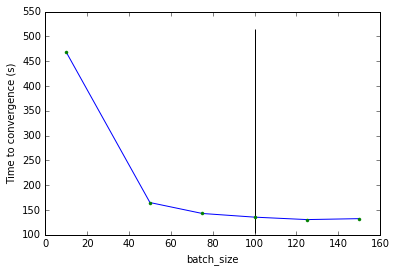

In [3]:
# plot results

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(batch_sizes,times) # lines
plt.plot(batch_sizes,times,'.') # dots
plt.vlines(n_clusters,0.8*min(times),1.1*max(times)) # vertical line

plt.xlabel('batch_size')
plt.ylabel('Time to convergence (s)')
plt.title('')

In [4]:
from msmbuilder import version
version.full_version

'3.4.0'